In [92]:

import numpy as np
from keras.models import Sequential 
from keras.layers import Dense ,Flatten
from keras.utils import to_categorical              
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.optimizers import Adam


uint8 (60000, 28, 28) uint8 (60000,)


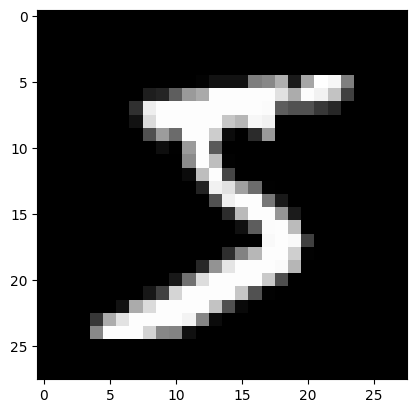

label is 5


In [93]:

#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.dtype, X_train.shape, y_train.dtype, y_train.shape)

plt.imshow(X_train[0], cmap='gray')
plt.show()
print(f"label is {y_train[0]}")

In [94]:
#method broadcasting to normalize data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#to categorical conversion
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [95]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))#1st layer
model.add(Dense(128,activation='relu'))#128 neuron 2nd layer
model.add(Dense(10,activation='softmax'))#3rd layer 

In [96]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
#train the model
res=model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)
print("Code executed successfully")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9074 - loss: 0.3318 - val_accuracy: 0.9500 - val_loss: 0.1789
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9560 - loss: 0.1518 - val_accuracy: 0.9621 - val_loss: 0.1303
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9687 - loss: 0.1075 - val_accuracy: 0.9676 - val_loss: 0.1096
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0817 - val_accuracy: 0.9718 - val_loss: 0.0984
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0650 - val_accuracy: 0.9728 - val_loss: 0.0907
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9848 - loss: 0.0519 - val_accuracy: 0.9721 - val_loss: 0.0891
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9739 - val_loss: 0.0865
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9901 - loss: 0.0337 - val_accuracy: 0.

In [98]:
# validation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0705
Validation loss: 0.07047762721776962
Validation accuracy: 0.9789999723434448


In [99]:
print(res.history.keys())
print(res.history.values())
print(res.history)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.9074166417121887, 0.9559791684150696, 0.968666672706604, 0.976645827293396, 0.981249988079071, 0.9848124980926514, 0.9872708320617676, 0.9900624752044678, 0.992479145526886, 0.9944375157356262], [0.3317551016807556, 0.15179398655891418, 0.10749496519565582, 0.08166813105344772, 0.06500639021396637, 0.051917873322963715, 0.041898809373378754, 0.033686429262161255, 0.02738342247903347, 0.022414986044168472], [0.949999988079071, 0.9620833396911621, 0.9675833582878113, 0.971750020980835, 0.9727500081062317, 0.972083330154419, 0.9739166498184204, 0.9749166369438171, 0.9756666421890259, 0.9758333563804626], [0.1788564920425415, 0.1303291618824005, 0.10957109928131104, 0.09839379787445068, 0.09066009521484375, 0.08910445123910904, 0.0864517018198967, 0.08656097203493118, 0.08340490609407425, 0.0799546167254448]])
{'accuracy': [0.9074166417121887, 0.9559791684150696, 0.968666672706604, 0.976645827293396, 0.981249988079

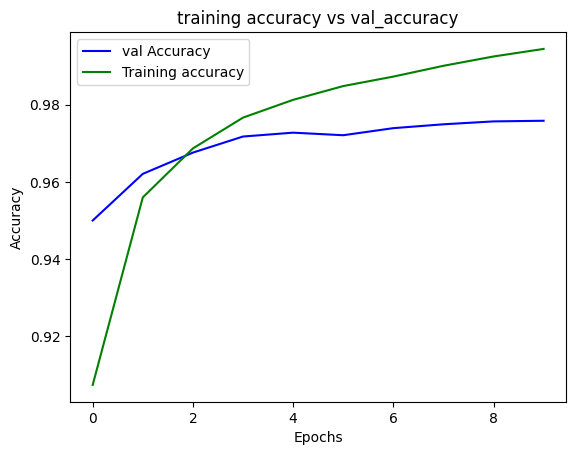

In [100]:
plt.plot(res.history['val_accuracy'], label='val Accuracy',color='blue')
plt.plot(res.history['accuracy'], label='Training accuracy',color='green')
plt.legend()
plt.title('training accuracy vs val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()